decision trees are used to make classification among choices. its like a binary search tree. we have roots and their childs nodes and we have to choose among the childs based on the condition. these child nodes are build based on the value of entropy and gini.
it can be applied using different techniques like information gain, gini.
for information gain we have to calculate entropy of data set. at the end multiply each entropy with the probability value and subtract from the entropy of whole data . the higher the information gain the better choice it will be.
entropy=-plog2(p) here p is the probability of choice
Information gain= entropy of whole system -(entropy of choice)
gini=1-(p^2), here p is the probability.
if a data set has same values for two choices then information gain will be 1 means there is high entropy in the system but gini is half

In [1]:
import pandas as pd

In [14]:
#preparing our own dataset
import numpy as np
temp=np.random.randint(20,100,size=50)
humidity=np.random.randint(50,100,size=50)
windspeed=np.random.randint(500,1100,size=50)
#0-don,t play, 1-play
choice=np.random.choice([0,1],size=50)
df=pd.DataFrame({'temperature':temp,'humidity':humidity,'wind speed':windspeed,'play':choice})
df['play'] = np.where((df['temperature']<30)&(df['humidity']>60)|(df['wind speed']<600),1,0)

df['play'].value_counts()

0    38
1    12
Name: play, dtype: int64

In [26]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]
df

,temperature,humidity,wind speed,play
0,66,66,600,0
1,29,86,956,1
2,43,93,1034,0
3,37,51,886,0
4,83,80,965,0
5,82,74,751,0
6,42,85,1043,0
7,64,89,714,0
8,54,64,1023,0
9,31,53,885,0


In [17]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.20,random_state=21)

In [15]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [18]:
try:
    model.fit(trainx,trainy)
    print("model is successfully trained")
except exception as e:
    print("model doesnot trained")

model is successfully trained


In [22]:
predict=model.predict(testx)

In [25]:
from sklearn.metrics import accuracy_score
print("accuracy of model is {:.2f}%".format(accuracy_score(testy,predict)*100))

accuracy of model is 90.00%


[Text(0.4, 0.875, 'x[2] <= 595.5\ngini = 0.375\nsamples = 40\nvalue = [30, 10]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.625, 'x[0] <= 29.5\ngini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(0.4, 0.375, 'x[2] <= 721.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]')]

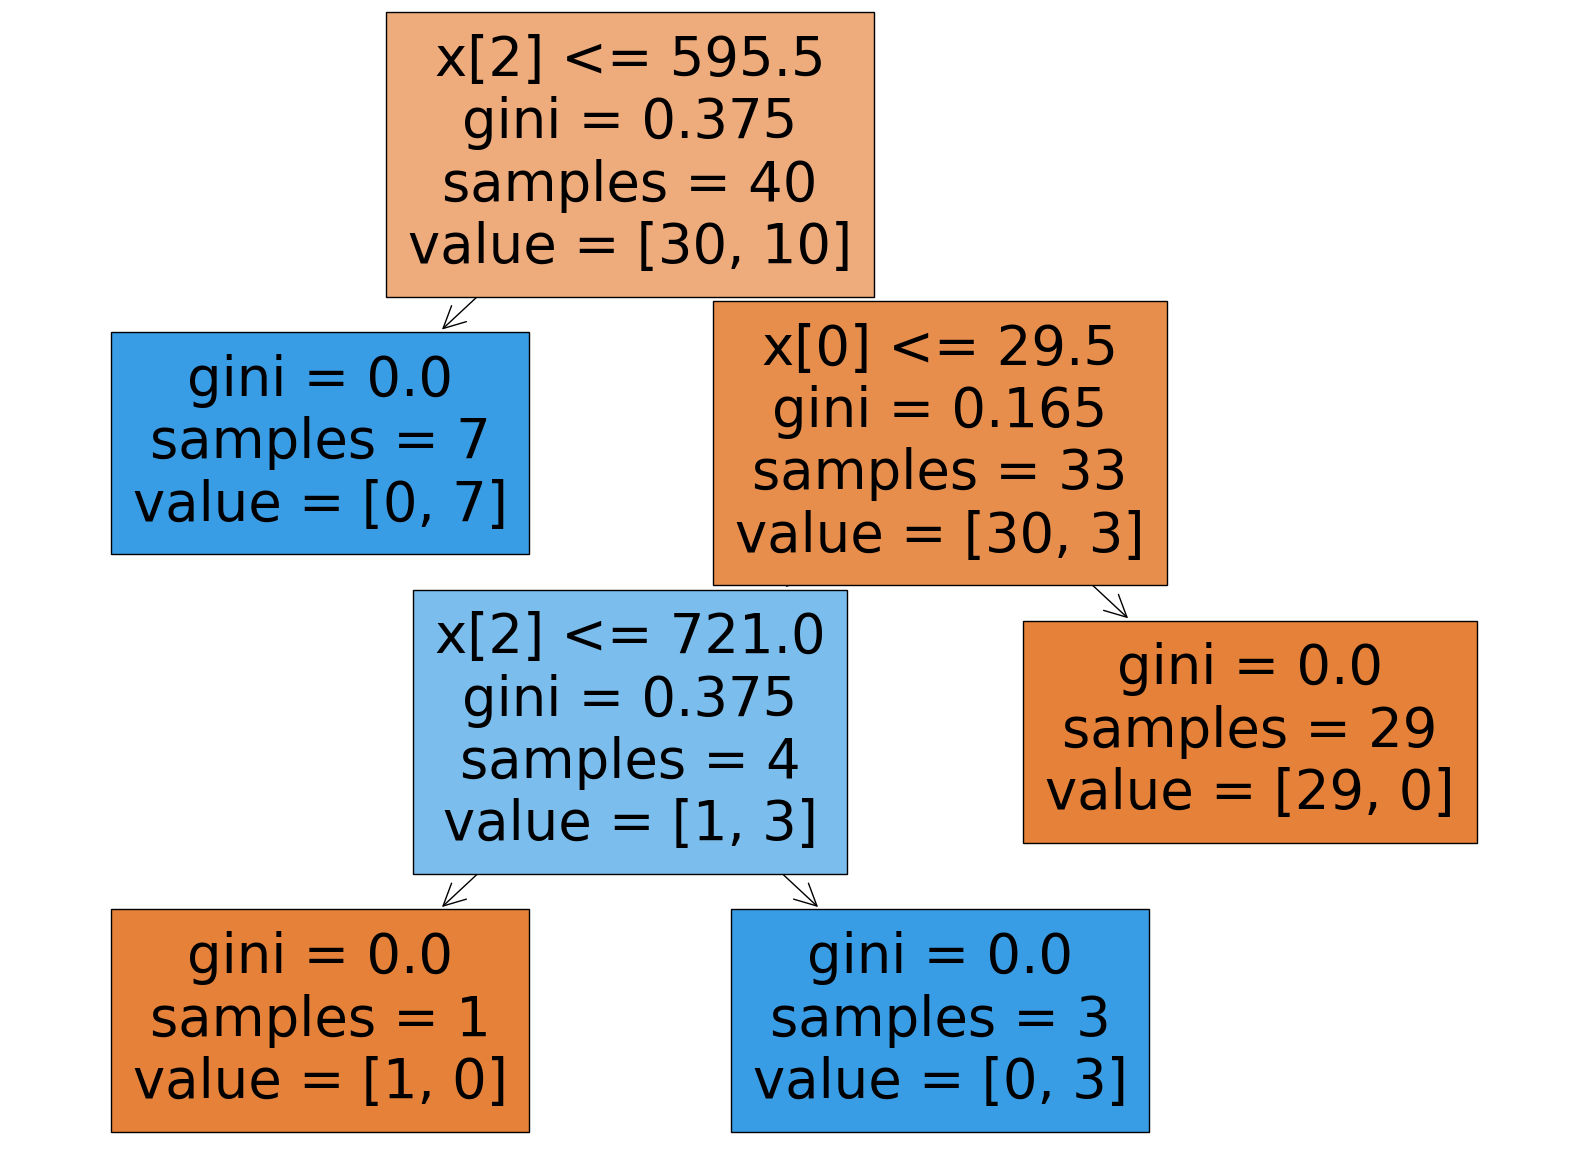

In [21]:
#printing the decision trees
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True)